# Análise Exploratória dos Dados


## Dependências	

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")

## Lendo os dados

In [28]:
PATH = '../data/historico_acoes_b3.csv'
df = pd.read_csv(PATH)

## Data inspection
display(df.head())

display(df.info())

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03 00:00:00+00:00,ALPA3.SA,0.345604,0.345604,0.345604,0.345604,0.233571,3.327500e+05
1,2000-01-03 00:00:00+00:00,BBAS3.SA,1.400000,1.426666,1.366666,1.366666,0.499397,1.029600e+06
2,2000-01-03 00:00:00+00:00,BBDC3.SA,2.096001,2.096001,2.013040,2.013040,1.052641,3.606480e+05
3,2000-01-03 00:00:00+00:00,BRAP3.SA,0.000167,0.000167,0.000167,0.000167,0.000035,3.496186e+08
4,2000-01-03 00:00:00+00:00,BRAP4.SA,3.500000,3.750000,3.500000,3.500000,0.824413,5.252000e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137369 entries, 0 to 2137368
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Ticker     object 
 2   Open       float64
 3   High       float64
 4   Low        float64
 5   Close      float64
 6   Adj Close  float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 130.5+ MB


None

## Pré-processamento dos dados


In [29]:
# Rename columns
cols_rename = {
    'Date': 'date',
    'Ticker': 'ticker',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'
}

# Apply column renaming
df.rename(columns=cols_rename, inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# time columns
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

# Get unique tickers
tickers = df['ticker'].unique().tolist()

print(f"Number of unique tickers: {len(tickers)}")
print(f"First 5 tickers: {tickers[:5]}")

Number of unique tickers: 582
First 5 tickers: ['ALPA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BRAP3.SA', 'BRAP4.SA']


In [30]:
tickers

['ALPA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BRAP3.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'CGRA4.SA',
 'CMIG3.SA',
 'CMIG4.SA',
 'COCE5.SA',
 'CPFE3.SA',
 'CPLE3.SA',
 'CPLE6.SA',
 'CSNA3.SA',
 'ABEV3.SA',
 'CGAS5.SA',
 'CCRO3.SA',
 'OIBR3.SA',
 'OIBR4.SA',
 'BRKM3.SA',
 'CSAN3.SA',
 'CSMG3.SA',
 'AGRO3.SA',
 'BEEF3.SA',
 'ABCB4.SA',
 'AMAR3.SA',
 'B3SA3.SA',
 'BPAN4.SA',
 'ALPA4.SA',
 'BBDC4.SA',
 'BRSR6.SA',
 'CEDO4.SA',
 'CIEL3.SA',
 'BRPR3.SA',
 'ADHM3.SA',
 'CEED3.SA',
 'APER3.SA',
 'ARZZ3.SA',
 'BPHA3.SA',
 'RAIL3.SA',
 'CTNM4.SA',
 'CYRE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ETER3.SA',
 'EUCA4.SA',
 'FESA4.SA',
 'GGBR3.SA',
 'GGBR4.SA',
 'GOAU3.SA',
 'GOAU4.SA',
 'ITSA3.SA',
 'ITSA4.SA',
 'ITUB3.SA',
 'TASA4.SA',
 'INEP3.SA',
 'ITUB4.SA',
 'GFSA3.SA',
 'GOLL4.SA',
 'GRND3.SA',
 'DASA3.SA',
 'JBSS3.SA',
 'EVEN3.SA',
 'FHER3.SA',
 'FRIO3.SA',
 'EZTC3.SA',
 'GSHP3.SA',
 'HBOR3.SA',
 'ELET6.SA',
 'ENGI4.SA',
 'EQTL3.SA',
 'HYPE3.SA',
 'YDUQ3.SA',
 'DIRR3.SA',
 'FLRY3.SA',
 'ECOR3.SA',

## Análise de Séries Temporais


### Preço das ações ao longo do tempo

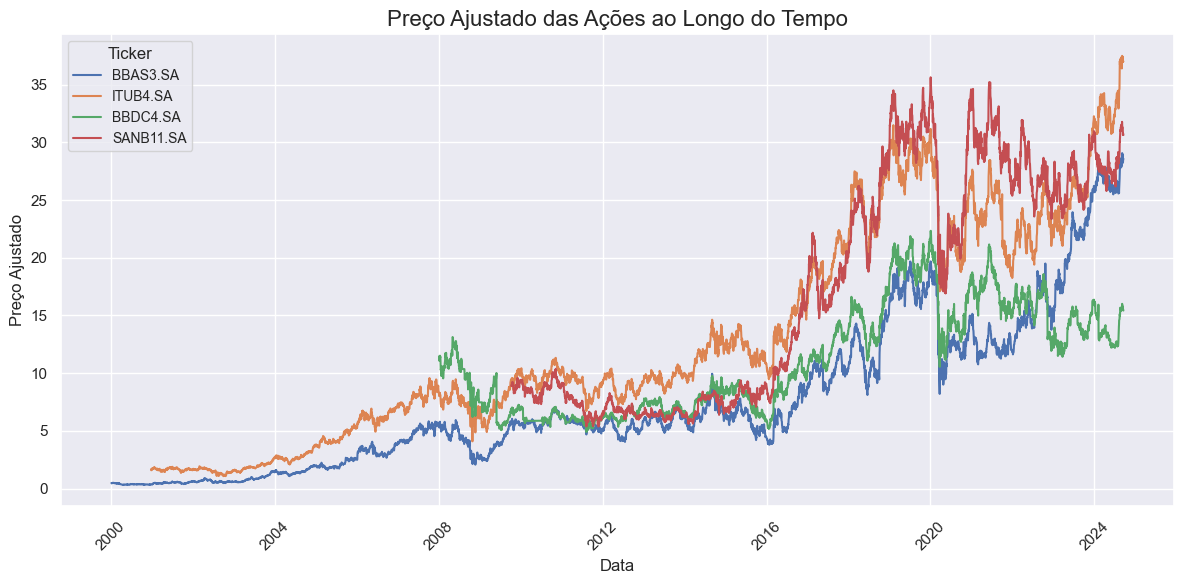

In [31]:
group = ['BBAS3.SA', 'ITUB4.SA', 'BBDC4.SA', 'SANB11.SA', ] 

# 'GOLL4.SA', 'AZUL4.SA', 'EMBR3.SA'
plt.figure(figsize=(12, 6))

# Plot the data for each ticker in group
for ticker in group:
    group_data = df[df['ticker'] == ticker]
    sns.lineplot(x=group_data.index, y='adj_close', data=group_data, label=ticker)

# Customize the plot
plt.title('Preço Ajustado das Ações ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço Ajustado', fontsize=12)
plt.legend(title='Ticker', title_fontsize='12', fontsize='10')

# Rotate x-axis labels para melhor legibilidade
plt.xticks(rotation=45)

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()


É possível observar que as ações dos principais bancos do brasil apresentam um comportamento muito similar ao longo do tempo. Eles possuem uma tendência de crescimento ao longo do tempo, com alguns picos e quedas, com maior queda no ano de 2020, provavelmente causada pela pandemia de COVID-19. 


### Preço das ações por ano

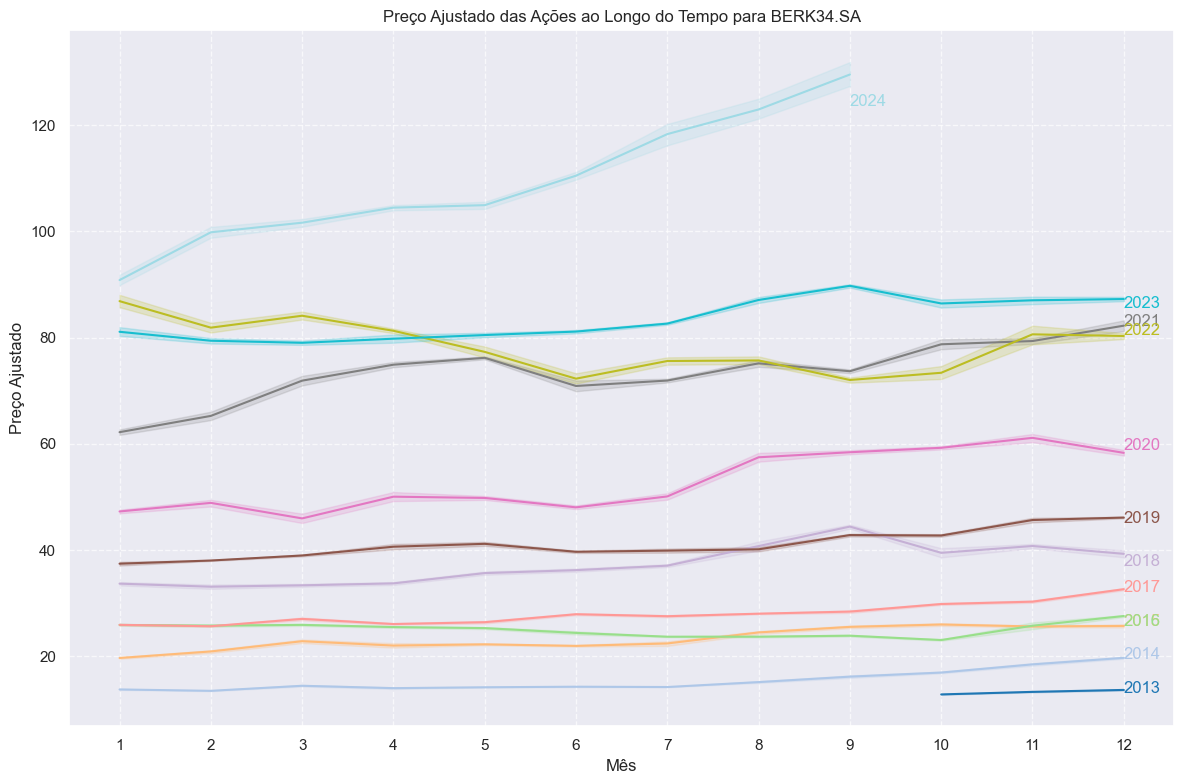

In [32]:
ticker = 'BERK34.SA'

# Criar uma figura e eixos
plt.figure(figsize=(12, 8))

# Plotar os dados para cada ticker em ticker
ticker_data = df[df['ticker'] == ticker]

# Obter anos únicos e atribuir cores
years = ticker_data['year'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(years)))

for year, color in zip(years, colors):
    year_data = ticker_data[ticker_data['year'] == year]
    line = sns.lineplot(x=year_data['month'], y=year_data['adj_close'], color=color, label=year)
    
    # Adicionar valor no final de cada linha
    last_point = year_data.iloc[-1]
    plt.text(last_point['month'], last_point['adj_close'], 
                f"{last_point['year']:.0f}", 
                color=color, ha='left', va='center')

plt.title(f'Preço Ajustado das Ações ao Longo do Tempo para {ticker}')
plt.xlabel('Mês')
plt.ylabel('Preço Ajustado')
plt.xticks(range(1, 13))  # Set x-ticks to months 1-12
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend().remove()


plt.tight_layout()
plt.show()

Não é possível identificar um padrão claro de sazonalidade nos dados.

### Preço das ações por mês

<Figure size 1400x1000 with 0 Axes>

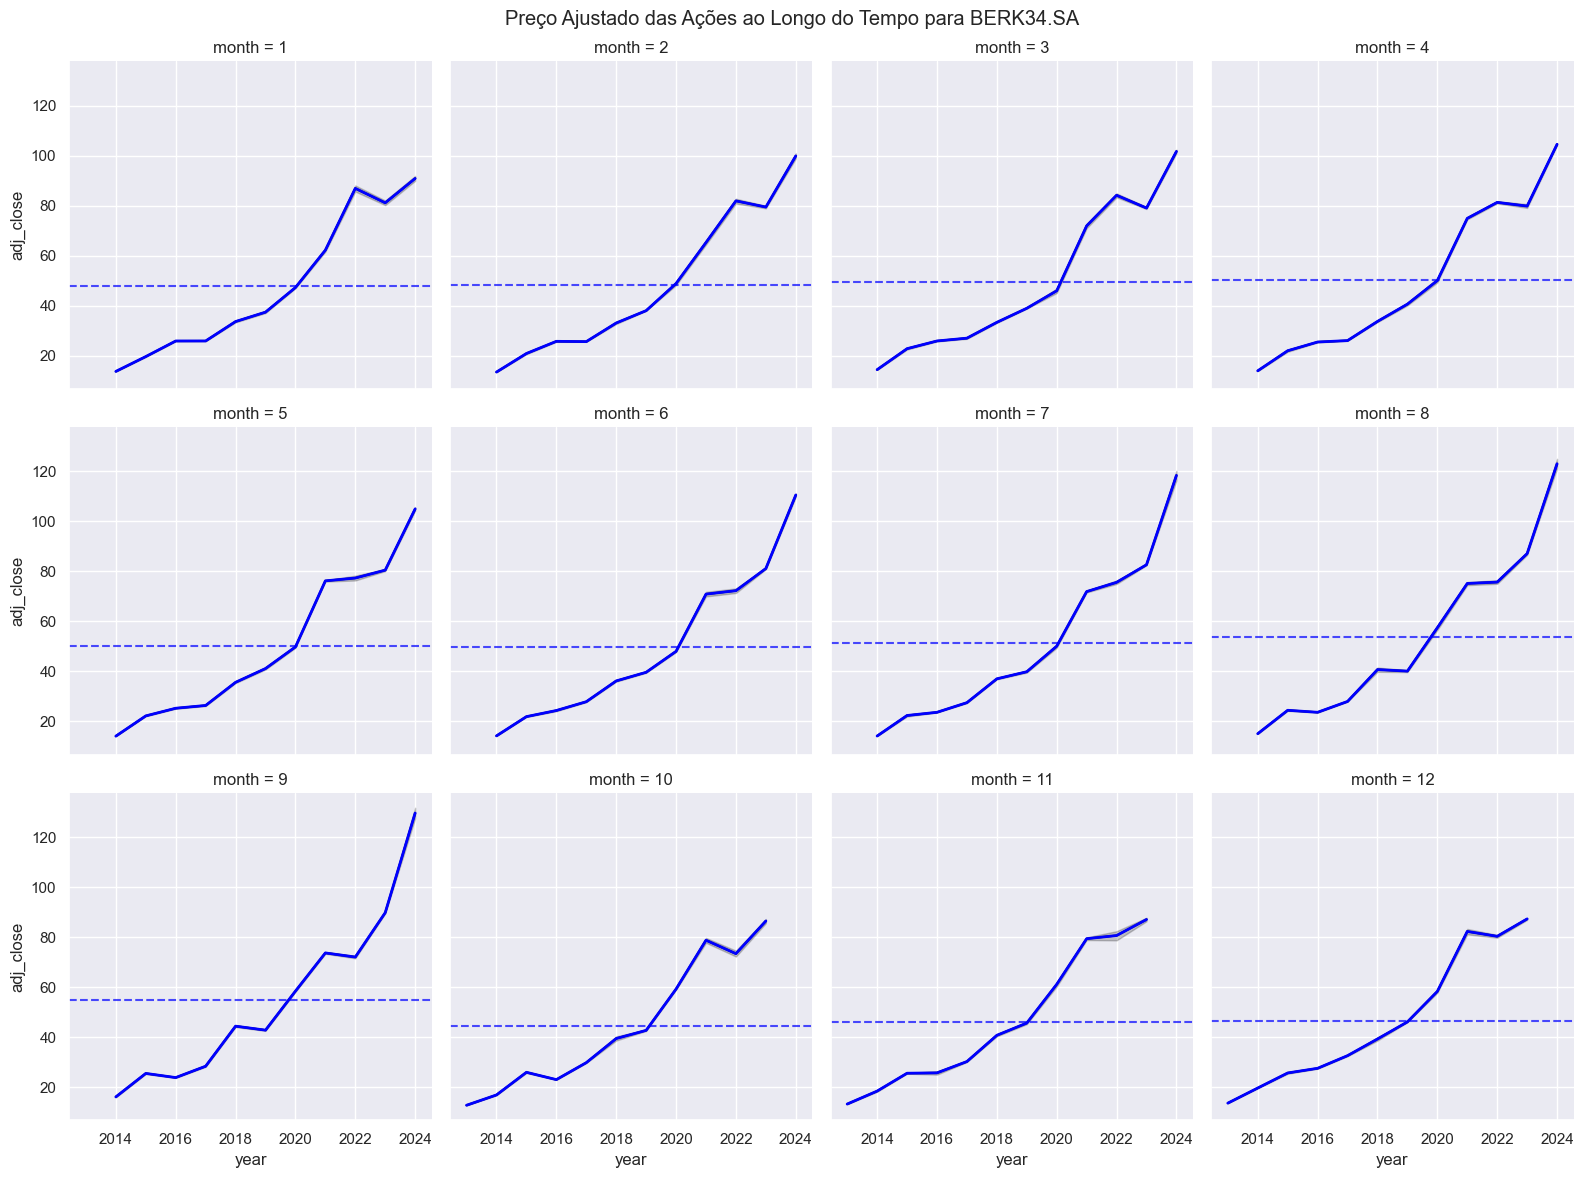

In [33]:
# Criar uma figura e eixos
plt.figure(figsize=(14, 10))

# Plotar gráfico sazonal para cada mês separadamente (FacetGrid)
g = sns.FacetGrid(ticker_data, col="month", col_wrap=4, height=4)
g.map(sns.lineplot, "year", "adj_close", color="black")

# Adicionar linha de tendência média para cada mês
for ax in g.axes.flat:
    month = ax.get_title().split('=')[-1].strip()
    monthly_avg = ticker_data[ticker_data['month'] == int(month)].groupby('year')['adj_close'].mean()
    ax.plot(monthly_avg.index, monthly_avg.values, color='blue', lw=2)
    
    # Adicionar linha média azul
    mean_value = monthly_avg.mean()
    ax.axhline(y=mean_value, color='blue', linestyle='--', alpha=0.7)

# Ajustar o layout
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle(f'Preço Ajustado das Ações ao Longo do Tempo para {ticker}')

plt.tight_layout()

plt.show()

Não foi possível identificar um padrão claro de sazonalidade intra-mês nos dados.

### Correlação

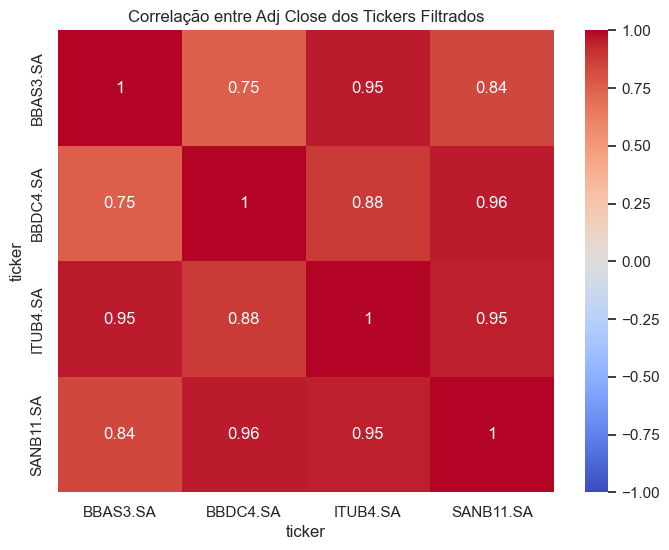

In [34]:
# Filtrar o dataframe pelos tickers
df_group = df[df['ticker'].isin(group)]

# Pivotar o dataframe para obter cada 'ticker' em uma coluna com seus valores 'adj_close'
df_pivot = df_group.pivot_table(values='adj_close', index='date', columns='ticker')

# Calcular a matriz de correlação entre os tickers
corr_matrix = df_pivot.corr()

# Criar o heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Adj Close dos Tickers Filtrados')
plt.show()

### Autocorrelação

<Figure size 1000x600 with 0 Axes>

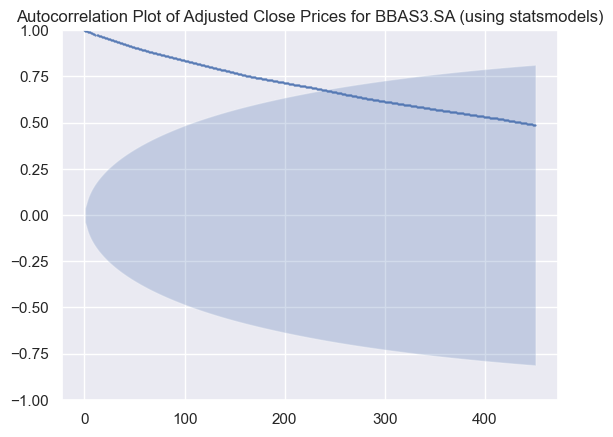

In [35]:
### Autocorrelação
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation using statsmodels' plot_acf function
plt.figure(figsize=(10, 6))
plot_acf(ticker_data['adj_close'], lags=450, linewidth=0.5, markersize=0.5, use_vlines=False)
plt.title('Autocorrelation Plot of Adjusted Close Prices for BBAS3.SA (using statsmodels)')
plt.show()

A partir da lag 450 a autocorrelação não é mais significativa

### Decomposição da série temporal

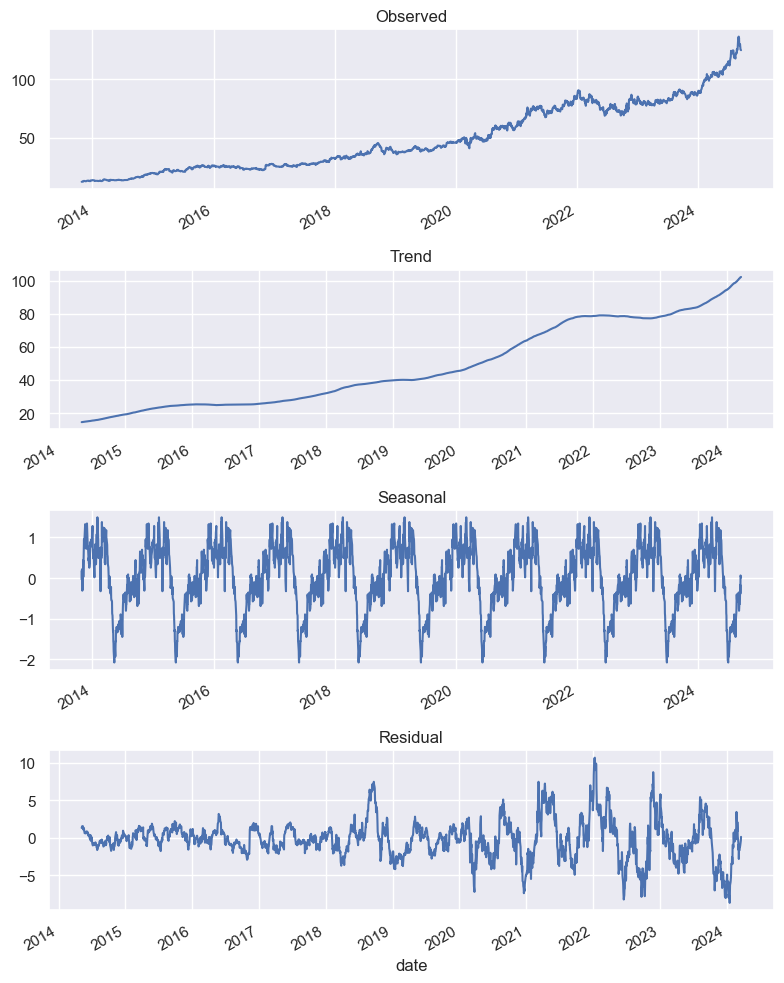

Trend component summary:
count    2454.000000
mean       48.199729
std        24.449362
min        14.483163
25%        25.222698
50%        40.047207
75%        77.214395
max       102.241905
Name: trend, dtype: float64

Seasonal component summary:
count    2706.000000
mean        0.001361
std         0.820352
min        -2.084796
25%        -0.516557
50%         0.039771
75%         0.672615
max         1.497722
Name: seasonal, dtype: float64

Residual component summary:
count    2454.000000
mean       -0.166106
std         2.544687
min        -8.670661
25%        -1.446779
50%        -0.208681
75%         1.085822
max        10.699356
Name: resid, dtype: float64


In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the index is a DatetimeIndex
ticker_data.index = pd.to_datetime(ticker_data.index)

# Perform seasonal decomposition
decomposition = seasonal_decompose(ticker_data['adj_close'], model='additive', period=252)  # 252 trading days in a year

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 10))

decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
ax1.set_xlabel('')

decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
ax2.set_xlabel('')

decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
ax3.set_xlabel('')

decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

# Print summary statistics of each component
print("Trend component summary:")
print(decomposition.trend.describe())
print("\nSeasonal component summary:")
print(decomposition.seasonal.describe())
print("\nResidual component summary:")
print(decomposition.resid.describe())

### Estatísticas descritivas

In [37]:
ticker_data.describe()

,open,high,low,close,adj_close,volume,year,month,day
count,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.00000,2706.000000
mean,49.505396,49.808436,49.155047,49.469290,49.469290,28881.317443,2018.780857,6.47524,15.757576
std,28.262461,28.566477,27.909948,28.224122,28.224122,56429.344269,3.157894,3.42022,8.754254
min,12.745000,12.775000,12.745000,12.747500,12.747500,0.000000,2013.000000,1.00000,1.000000
25%,25.650000,25.700376,25.610374,25.700001,25.700001,2000.000000,2016.000000,4.00000,8.000000
50%,40.561249,40.586498,40.487499,40.545250,40.545250,11952.000000,2019.000000,6.50000,16.000000
75%,75.849998,76.470001,74.842499,75.620001,75.620001,34000.000000,2022.000000,9.00000,23.000000
max,135.070007,136.830002,133.770004,136.070007,136.070007,866000.000000,2024.000000,12.00000,31.000000
